In [1]:
library(ggplot2)
library(lattice)
library(plyr)
library(Rmisc)
set.seed(139)

m <- 650
lambda <- 1.32
theoric_confidence_interval <- 0.93
dimensions <- seq(100, 5000, 100)

calculate_mean_widths <- function(n) {
  widths <- c()
  for (i in 1:m) {
    exp <- rexp(n, rate=lambda)
    confidence_interval <- CI(exp, ci=theoric_confidence_interval)
    widths <- c(widths, c(abs(confidence_interval[["upper"]] - confidence_interval[["lower"]])))
  }
  return (mean(widths))
}

mean_widths <- c()
for (n in dimensions) {
  mean_widths <- c(mean_widths, calculate_mean_widths(n))
}

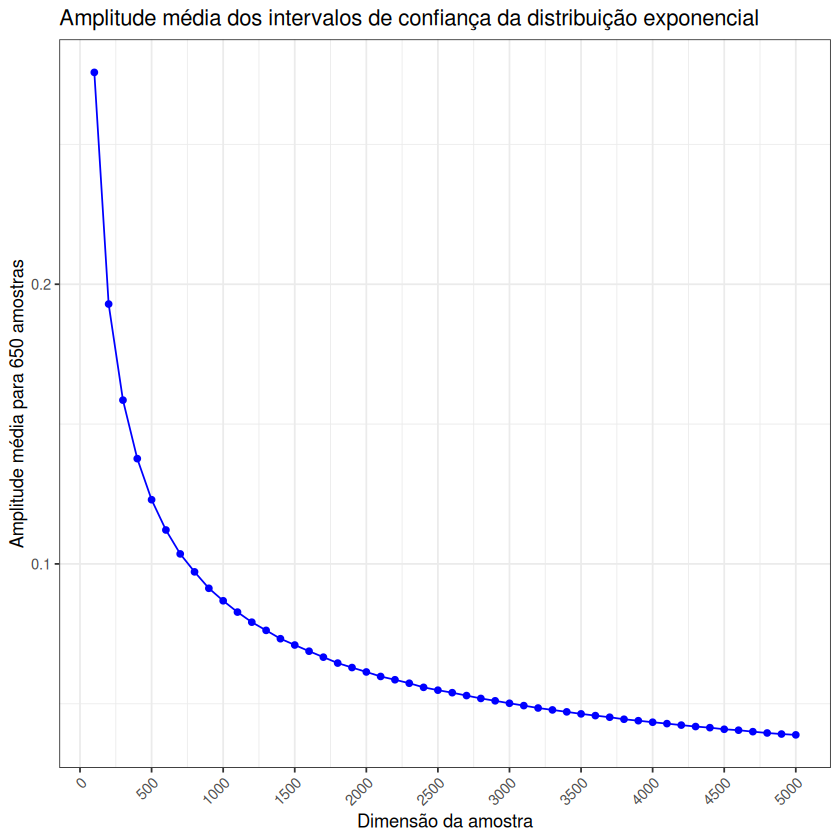

In [3]:
ggplot(data.frame(dimensions, mean_widths), aes(x=dimensions, y=mean_widths)) +
  geom_line(color="blue") +
  geom_point(color="blue") +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  xlab("Dimensão da amostra") + ylab("Amplitude média para 650 amostras") +
  ggtitle("Amplitude média dos intervalos de confiança da distribuição exponencial") +
  scale_x_continuous(breaks = round(seq(0, 5000, 500)))